In [216]:
import pandas as pd
import numpy as np

In [217]:
london_flows=pd.read_csv("data/london_flows.csv")
london_flows=london_flows[london_flows['station_origin']!=london_flows["station_destination"]]
london_flows=london_flows[london_flows['distance'] != 0]# drop intra station
london_flows=london_flows[london_flows['station_origin'] != 'Battersea Park']
london_flows=london_flows[london_flows['station_destination'] != 'Battersea Park']


In [218]:
# change column name
london_flows=london_flows.rename(columns={"station_origin":"Orig","station_destination":'Dest','flows':'Total','distance':'Dist','population':'Oi_origpop','jobs':'Dj_destjob'})

In [219]:
london_flows.head(15)

,Orig,Dest,Total,Oi_origpop,Dj_destjob,Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852
1,Abbey Road,Beckton,1,599,442,8510.047006
2,Abbey Road,Blackwall,3,599,665,3775.359872
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941
4,Abbey Road,Canning Town,37,599,15428,2228.874185
5,Abbey Road,Crossharbour,1,599,1208,6686.335036
6,Abbey Road,Custom House,0,599,845,3824.789936
7,Abbey Road,Cutty Sark,2,599,1748,8503.736582
8,Abbey Road,Cyprus,7,599,850,6532.037185
9,Abbey Road,Devons Road,1,599,611,3958.290432


In [220]:
# create a pivot table to monitor flows
ldf_submat=pd.pivot_table(london_flows,values ="Total", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)

In [221]:
ldf_submat

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


# Spatial Interaction model


## classic multiplicate gravity model:

\begin{equation} \tag{1}
T_{ij} = k \frac{O_i^\alpha  D_j^\gamma}{ d_{ij}^\beta}
\end{equation}

This gravity model can be written in the form more familiar from [Wilson's 1971 paper](http://journals.sagepub.com/doi/abs/10.1068/a030001) 

\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

<b>This model just says that the flows between an origin and destination are proportional to the product of the mass (attractor) of the origin and destination and inversley proportional to the distance between them.
    
As origin and destination masses increase, flows increase, but as distance increases, flows decrease, and vice versa.</b>

- Where $T_{ij}$ is the transition or flow, $T$, between origin $i$ (always the rows in a matrix) and destination $j$ (always the columns in a matrix). 
- $O$ is a vector (a 1 dimensional matrix - or, if you like, a single line of numbers) of origin attributes which relate to the emissiveness of all origins in the dataset, $i$ 
- $D$ is a vector of desination of attributes relating to the attractivenss of all destinations in the dataset, $j$ - in our sample dataset, we have a vector of destination populations (which I have called Dj1_destpop) and a vector of destination average salaries (which I have called Dj2_destsal) in 2001
- $d$ is a matrix of costs relating to the flows between $i$ and $j$ 
- $k$, $\alpha$, $\gamma$ and $β$ are all the model parameters to be estimated

$k$ is a constant of proportionality. Given that all flows estimated by the model will sum to any observed flow data used to calibrate the parameters:

\begin{equation} \tag{3}
k = \frac{T}{\sum_i \sum_j O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}}
\end{equation}

and $T$ is the sum of our matrix of observed flows or:

\begin{equation} \tag{4}
T= \sum_i \sum_j T_{ij}
\end{equation}

This is just the sum of all observed flows divided by the sum of all of the other elements in the model.


### Estimating Model Parameters

Try to produce some flow estimates by plugging some arbitrary or expected estimated values into our parameters. 

The parameters relate to the scaling effect / importance of the variables they are associated with.

 Most simply, where the effects of origin and destination attributes on flows scale in a linear fashion (i.e. for a 1 unit increase in, say, population at origin, we might expect a 1 unit increase in flows of people from that origin, or for a halving in average salary at destination, we might expect a halving of commuters), $\alpha$ = 1 and $\gamma$ = 1. 
 
 In Newton’s original gravity equation, $\beta$ = 2 where the influence of distance on flows follows a power law - i.e. for a 1 unit increase in distance, we have a $1^{-2}$ (1) unit decrease in flows, for a 2 unit increase in distance, we have $2^{-2}$ (0.25 or 1/4) of the flows, for a 3 unit increase, $3^{-2}$ (0.111) etc.

Let’s see if these parameters are a fair first guess (we’ll use the whole dataset in order to get a less messy picture)…


### Start flow estimatin with initial parameters

In [222]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(london_flows["Total"])

In [223]:
# apply parameters to variables
Oi_alpha=london_flows['Oi_origpop']**alpha
Dj_gamma = london_flows["Dj_destjob"]**gamma
dist_beta = london_flows["Dist"]**-beta
T1 = Oi_alpha*Dj_gamma*dist_beta
k = T2/sum(T1)

Based on equation 2
\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

get flow estimation simply by multiplying variables with parameter power

In [224]:
london_flows['unconstrainedEst1']=round(k*Oi_alpha*Dj_gamma*dist_beta,0)


In [225]:
# check for inf and nan values in column A
mask = np.isinf(london_flows['unconstrainedEst1']) | np.isnan(london_flows['unconstrainedEst1'])

# locate the rows with inf or nan values
inf_nan_rows = london_flows[mask]



In [226]:

# convert to int
london_flows['unconstrainedEst1']=london_flows['unconstrainedEst1'].astype(int)
#check estimation
sum(london_flows['unconstrainedEst1'])

1538980

Turn the estimation into a matrix to look at the predictors flows

In [227]:
ldf_submat1=london_flows.pivot_table(values ="unconstrainedEst1", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat1

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,562
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,54
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,2.0,0.0,NaN,2.0,...,1.0,0.0,0.0,2.0,NaN,0.0,NaN,0.0,NaN,611
Aldgate,NaN,NaN,0.0,NaN,149.0,NaN,NaN,0.0,NaN,25.0,...,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,9963
Aldgate East,NaN,NaN,0.0,161.0,NaN,NaN,0.0,0.0,NaN,24.0,...,1.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,8082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,332
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,213


## Evalutation of model
Goodness of fit
*coefficient of determination ($r^2$)
 $r^2$ is popular as it is quite intuitive and can be compared across models.
*the Square Root of Mean Squared Error (RMSE).
Less intuitive but can be used to comparing changes to the same model.


In [228]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2


In [229]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE


In [230]:

CalcRMSE(london_flows["Total"], london_flows["unconstrainedEst1"])

485.566

RMSE can be used to assessing whether changed to the model results in any improvements. The closer the value of RMSE to 0 the better the model.


In [231]:

CalcRSqaured(london_flows["Total"], london_flows["unconstrainedEst1"])

0.03463357885387822

The initial model accounts for about 35% of the variation of flows in the system.

## Parameter calibration

## Poisson regression
( a Poisson or negative binomial regression model.)

*Main theory*

The sorts of flows that spatial interaction models deal with (such as migration or commuting flows) relate to non-negative integer counts (you can’t have negative people moving between places and you can’t - normally, if they are alive - have fractions of people moving either).
As such, the continuous (normal) probability distributions which underpin standard regression models don’t hold. However, the discrete probability distributions such as the Poisson distribution and the negative binomial distribution (of which the Poisson distribution is a special case - wikipedia it) do hold and so we can use these associations to model our flows.

In [232]:
from matplotlib import pyplot as plt
# distribution of flow
plt.subplots(figsize=(10,10))

plt.hist(london_flows["Total"], histtype="stepfilled" , bins = 50)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)
#plt.show()

#### Respecify the poisson regression spatial interaction model

Assume the flows follow a Poisson distribution
Expected value $\lambda$ verifies
\begin{equation} \tag{6}
\lambda_{ij} = \exp (K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

It means that $\lambda_{ij}$, the estimate of $T_{ij}$ is *logarithmically linked* to a linear combination of the logarithm independent vairables in the model.


Run Poisson Regression Model using
`glm` function

In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["Oi_origpop", "Dj_destjob", "Dist"]
log_x_vars = []
for x in x_variables:
    london_flows[f"log_{x}"] = np.log(london_flows[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'Total ~ log_Oi_origpop + log_Dj_destjob + log_Dist'


#run the regression
uncosim = smf.glm(formula = formula, 
                  data=london_flows, 
                  family=sm.families.Poisson()).fit()


Use `summmary()` function to check the model parameters


In [234]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Mon, 01 May 2023   Deviance:                   2.3847e+06
Time:                        13:59:20   Pearson chi2:                 4.76e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7473      0.014   -273.

**Note**: $\beta=0.6228$ since it has a negative mark
 
Now assign the calibrated parameters back to the model

In [235]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
london_flows["unconstrainedEst2"] = np.exp(K 
                                       + alpha*london_flows["log_Oi_origpop"] 
                                       + gamma*london_flows["log_Dj_destjob"] 
                                       - beta*london_flows["log_Dist"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
london_flows["fitted"] = predictions_summary_frame["mean"]

In [236]:
uncosim.mu

array([49.61660108,  0.93718508,  2.12143467, ...,  5.34868361,
       14.1152109 , 12.38811083])

In [237]:
#round the numbers so that we don't get a half of a person
london_flows["unconstrainedEst2"] = round(london_flows["unconstrainedEst2"], 0)
#convert to integers
london_flows["unconstrainedEst2"] = london_flows["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(london_flows["unconstrainedEst2"])

1542350

In [238]:
ldf_submat2=london_flows.pivot_table(values ="unconstrainedEst2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat2

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [239]:
# compare to the real data
ldf_submat

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


Check goodness of fit to see if the model has improved


In [240]:
CalcRMSE(london_flows["Total"], london_flows["unconstrainedEst2"])


108.335

In [241]:

CalcRSqaured(london_flows["Total"], london_flows["unconstrainedEst2"])

0.321184453964865

The RMSE improved from 485.566 to 108.335 and $r^2$ improved from 0.346 to0.321


## Production (origin)-constrained model

\begin{equation} \tag{7}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}
where

\begin{equation}  \tag{8}
O_i = \sum_j T_{ij}
\end{equation}
and
\begin{equation}  \tag{9}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}
 
 In the production-constrained model, $O_i$ does not have a parameter as it is a known constraint. $A_i$ is known as a <i>balancing factor</i> and is a vector of values which relate to each origin, $i$, which do the equivalent job to $k$ in the unconstrained/total constrained model but ensure that flow estimates from each origin sum to the known totals, $O_i$ rather than just the overall total.

We set about re-specifying the Production Constrained model as a Poisson regression model.

 We need to take logs of the right-hand side of the equation and assume that these are logarithmically linked to the Poisson distributed mean ($\lambda_{ij}$) of the $T_{ij}$ variable. As such, Equation (7) becomes:
 
 \begin{equation}  \tag{10}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

where $\alpha_i$ is the equivalent of the vector of balancing factors $A_i$, but in regression /log-linear modelling terminology can also be described as either <b>dummy variables</b> or <b>fixed effects</b>. In practical terms, what this means is that in our regression model, $\alpha_i$ is modelled as a [categorical predictor](https://en.wikipedia.org/wiki/Categorical_variable) and therefore in the Poisson regression model, we don't use the numeric values of $O_i$, we can use a categorical identifier for the origin. In terms of the example table above, for Barking and Dagenham we wouldn't use 5675 as we would if we were fitting Equation (1), we would just used 'Barking and Dagenham'.


Model parameter calibration 

In [242]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'Total ~ Orig + log_Dj_destjob + log_Dist-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=london_flows, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Mon, 01 May 2023   Deviance:                   1.8615e+06
Time:                        13:59:52   Pearson chi2:                 2.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Orig[A

$\gamma$=0.7686

$\beta$=0.8782

### Model estimates

Create $O_i$ and $D_j$ columns

In [302]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take london_flows ...then... group by orig ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(london_flows.groupby(["Orig"])["Total"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
london_flows = london_flows.merge(O_i, on = "Orig", how = "left" )

D_j = pd.DataFrame(london_flows.groupby(["Dest"])["Total"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
london_flows = london_flows.merge(D_j, on = "Dest", how = "left" )

In [244]:
# get coefficient in prodsim
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(Orig)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
london_flows = london_flows.merge(coefs, left_on="Orig", right_on="coef", how = "left")
london_flows.drop(columns = ["coef"], inplace = True)
#check this has worked
london_flows.head()

c:\Users\skyla\miniconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Orig,Dest,Total,Oi_origpop,Dj_destjob,Dist,unconstrainedEst1,log_Oi_origpop,log_Dj_destjob,log_Dist,unconstrainedEst2,fitted,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852,10,6.395262,11.271478,9.003490,50,49.616601,599,78549,3.250549
1,Abbey Road,Beckton,1,599,442,8510.047006,0,6.395262,6.091310,9.049003,1,0.937185,599,442,3.250549
2,Abbey Road,Blackwall,3,599,665,3775.359872,0,6.395262,6.499787,8.236251,2,2.121435,599,665,3.250549
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941,18,6.395262,10.981421,8.534327,53,53.296799,599,58772,3.250549
4,Abbey Road,Canning Town,37,599,15428,2228.874185,25,6.395262,9.643939,7.709252,32,32.209683,599,15428,3.250549


In [320]:
# save parameter values into some variables
alpha_i=prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [321]:
gamma

0.768612478678105

In [322]:
beta

0.8781569676332593

Now generate estimates:


In [246]:
london_flows["prodsimest1"] = np.exp(london_flows["alpha_i"]+gamma*london_flows["log_Dj_destjob"] 
                                 - beta*london_flows["log_Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
london_flows.head(10)

,Orig,Dest,Total,Oi_origpop,Dj_destjob,Dist,unconstrainedEst1,log_Oi_origpop,log_Dj_destjob,log_Dist,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852,10,6.395262,11.271478,9.003490,50,49.616601,599,78549,3.250549,55.007531
1,Abbey Road,Beckton,1,599,442,8510.047006,0,6.395262,6.091310,9.049003,1,0.937185,599,442,3.250549,0.986059
2,Abbey Road,Blackwall,3,599,665,3775.359872,0,6.395262,6.499787,8.236251,2,2.121435,599,665,3.250549,2.755627
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941,18,6.395262,10.981421,8.534327,53,53.296799,599,58772,3.250549,66.455165
4,Abbey Road,Canning Town,37,599,15428,2228.874185,25,6.395262,9.643939,7.709252,32,32.209683,599,15428,3.250549,49.061156
5,Abbey Road,Crossharbour,1,599,1208,6686.335036,0,6.395262,7.096721,8.807821,2,2.340156,599,1208,3.250549,2.639337
6,Abbey Road,Custom House,0,599,845,3824.789936,0,6.395262,6.739337,8.249259,3,2.524972,599,845,3.250549,3.275082
7,Abbey Road,Cutty Sark,2,599,1748,8503.736582,0,6.395262,7.466228,9.048261,3,2.668634,599,1748,3.250549,2.838827
8,Abbey Road,Cyprus,7,599,850,6532.037185,0,6.395262,6.745236,8.784474,2,1.817323,599,850,3.250549,2.056230
9,Abbey Road,Devons Road,1,599,611,3958.290432,0,6.395262,6.415097,8.283568,2,1.931300,599,611,3.250549,2.476880


#### Assessing the model output

Flow matrix

In [247]:
#first round the estimates
london_flows["prodsimest1"] = round(london_flows["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
ldf_submat_prodc = london_flows.pivot_table(values ="prodsimest1", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat_prodc

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [248]:
ldf_submat

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [249]:
CalcRSqaured(london_flows["Total"], london_flows["prodsimest1"])

0.3883286233312407

In [250]:
CalcRMSE(london_flows["Total"], london_flows["prodsimest1"])

102.888

## Attraction (destination)-constrained model

Description 
Equation 
Parameters

## 3. Attraction-Constrained Model

The attraction constrained model is virtually the same as the PRoduction constrained model:

\begin{equation}  \tag{5}
T_{ij} = D_j B_j O_i^\alpha d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation}  \tag{6}
D_j = \sum_i T_{ij}
\end{equation}

and 

\begin{equation}  \tag{7}
B_j = \frac{1}{\sum_i O_i^\alpha d_{ij}^{-\beta}}
\end{equation}

I won't dwell on the attraction constrained model, except to say that it can be run in Python as you would expect:

\begin{equation}  \tag{8}
\lambda_{ij} = \exp (\alpha \ln O_i + \gamma_j - \beta \ln d_{ij})
\end{equation}



In [251]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form = 'Total ~ Dest + log_Oi_origpop + log_Dist-1'
#run a destination constrained sim
attrSim = smf.glm(formula = attr_form, data=london_flows, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1646e+06
Date:                Mon, 01 May 2023   Deviance:                   2.1570e+06
Time:                        14:00:23   Pearson chi2:                 3.65e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Dest[A

In [252]:
#get the predictions
predictions = attrSim.get_prediction(london_flows[["Dest", "log_Oi_origpop", "log_Dist"]])
predictions_summary_frame = predictions.summary_frame()
london_flows["attrsimFitted"] = round(predictions_summary_frame["mean"],0)
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
ldf_submat_attrcon = london_flows.pivot_table(values ="attrsimFitted", index="Orig", columns = "Dest",
                                    aggfunc=np.sum, margins=True)
ldf_submat_attrcon

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,591.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,586.0
Acton Town,NaN,NaN,NaN,16.0,16.0,NaN,8.0,1.0,NaN,17.0,...,26.0,3.0,5.0,9.0,NaN,2.0,NaN,2.0,NaN,3546.0
Aldgate,NaN,NaN,6.0,NaN,62.0,NaN,NaN,1.0,NaN,36.0,...,19.0,NaN,6.0,5.0,NaN,2.0,NaN,3.0,NaN,5702.0
Aldgate East,NaN,NaN,6.0,68.0,NaN,NaN,3.0,1.0,NaN,37.0,...,20.0,2.0,7.0,5.0,NaN,3.0,NaN,3.0,NaN,6029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,20.0,21.0,NaN,NaN,NaN,NaN,19.0,...,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3431.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0
Woodside Park,NaN,NaN,5.0,14.0,13.0,NaN,2.0,NaN,NaN,16.0,...,15.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2404.0


In [253]:
# follow the prodecure of production constrained model 
# save parameter values into some variables
alpha_i=attrSim.params[0:-2]
gamma = attrSim.params[-2]
beta = -attrSim.params[-1]

In [254]:
CalcRMSE(london_flows['Total'],london_flows["attrsimFitted"])

106.015

In [255]:
CalcRSqaured(london_flows['Total'],london_flows["attrsimFitted"])

0.34991505573480136

Make estimation


# Doubly constrained model

For the doubly constrained model:

- We might be interested in understanding the changing patterns of commuting or migration over time. Data from the Census allows us to know an accurate snap-shot of migrating and commuting patterns every 10 years. In these full data matrices, we know both the numbers of commuters/migrants leaving origins and arriving at destinations as well as the interactions between them. If we constrain our model estimates to this known information at origin and destination, we can examine various things, including:
    - The ways that the patterns of commuting/migration differ from the model predictions - where we might get more migrant/commuter flows than we would expect
    - How the model parameters vary over time - for example how does distance / cost of travel affect flows over time? Are people prepared to travel further or less far than before?




Which we can now introduce.

Let us begin with the formula:

\begin{equation} \tag{9}
T_{ij} = A_i B_j O_i D_j d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \tag{10}
O_i = \sum_j T_{ij}
\end{equation}

\begin{equation} \tag{11}
D_j = \sum_i T_{ij} 
\end{equation}

and

\begin{equation} \tag{12}
A_i = \frac{1}{\sum_j B_j D_j d_{ij}^{-\beta}}
\end{equation}

\begin{equation} \tag{13}
B_j = \frac{1}{\sum_i A_i O_i d_{ij}^{-\beta}}
\end{equation}

Now, the astute will have noticed that the calculation of $A_i$ relies on knowing $B_j$ and the calculation of $B_j$ relies on knowing $A_i$. A conundrum!! If I don’t know $A_i$ how can I calcuate $B_j$ and then in turn $A_i$ and then $B_j$ ad infinitum???!!

Well, I wrestled with that for a while until I came across [this paper by Martyn Senior](http://journals.sagepub.com/doi/abs/10.1177/030913257900300218) where he sketches out a very useful algorithm for iteratively arriving at values for $A_i$ and $B_j$ by setting each to equal to 1 initially and then continuing to calculate each in turn until the difference between each value is small enough not to matter.

We will return to this later, but for now, we will once again used the awesome power of Python to deal with all this difficulty for us!

We can run the doubly constrained model in exactly the same way as we ran the singly constrained models:

\begin{equation} \tag{14}
\lambda_{ij} = \exp (\alpha_i + \gamma_j -\beta \ln d_{ij})
\end{equation}

now in python:

In [256]:
london_flows.head()

,Orig,Dest,Total,Oi_origpop,Dj_destjob,Dist,unconstrainedEst1,log_Oi_origpop,log_Dj_destjob,log_Dist,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1,attrsimFitted
0,Abbey Road,Bank and Monument,0,599,78549,8131.410852,10,6.395262,11.271478,9.003490,50,49.616601,599,78549,3.250549,55.0,53.0
1,Abbey Road,Beckton,1,599,442,8510.047006,0,6.395262,6.091310,9.049003,1,0.937185,599,442,3.250549,1.0,3.0
2,Abbey Road,Blackwall,3,599,665,3775.359872,0,6.395262,6.499787,8.236251,2,2.121435,599,665,3.250549,3.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.404941,18,6.395262,10.981421,8.534327,53,53.296799,599,58772,3.250549,66.0,70.0
4,Abbey Road,Canning Town,37,599,15428,2228.874185,25,6.395262,9.643939,7.709252,32,32.209683,599,15428,3.250549,49.0,33.0


In [278]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'Total ~ Dest + Orig + log_Dist-1'
#run a doubly constrained sim
doubSim_pow = smf.glm(formula = dbl_form, data=london_flows, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim_pow.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Mon, 01 May 2023   Deviance:                   1.7693e+06
Time:                        15:00:18   Pearson chi2:                 2.47e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
De

In [258]:
#get the estimates
london_flows["doubsimfitted"] = np.round(doubSim_pow.mu)
#here's the matrix
ldf_submat_dbc = london_flows.pivot_table(values ="doubsimfitted", index="Orig", columns = "Dest",
                                    aggfunc=np.sum, margins=True)
ldf_submat_dbc

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [260]:
# evaluate the goodness of fit
CalcRMSE(london_flows['Total'],london_flows["doubsimfitted"])

101.331

In [261]:
CalcRSqaured(london_flows['Total'],london_flows["doubsimfitted"])

0.40772748658809344

### Calibration

## 4.1 Tweaking our model

### 4.1.1 Distance Decay

Now, all of the way through these practicals, we have assumed that the distance decay parameter follows a negative power law. Well, it doesn't need to.

In [Wilson's original paper](http://journals.sagepub.com/doi/abs/10.1068/a030001) he generalised the distance decay parameter to:

\begin{equation} \tag{15}
f(d_{ij})
\end{equation}

Where $f$ represents some function of distance describing the rate at which the flow interactions change as distance increase. Lots of people have written about this, including [Talyor](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1538-4632.1971.tb00364.x) and more recently Robin Lovelace in a transport context, [here](https://www.slideshare.net/ITSLeeds/estimating-distance-decay-for-the-national-propensity-to-cycle-tool).

For the inverse power law that we have been using one pussible function of distance, the other common one that is used is the negative exponential function:

\begin{equation} \tag{16}
\exp (-\beta d_{ij})
\end{equation}

We can get a feel for how different distance decay parameters work by plotting some sample data (try different parameters):

The inverse power function has a far more rapid distance decay effect than the negative exponential function.

* If the observed interacion drop off rapidly with distance-> inverse power law. e.g the trips to local convenience store by walking.

* If the effect of distance is less severe, eg migration across London as commuication-> negative exponential function 

Poission regression model:

$-\beta d_{ij}$

In [279]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "Total ~ Orig + Dest + Dist -1"
doubsim_exp = smf.glm(formula=doubsim_form, data = london_flows, family = sm.families.Poisson()).fit()
print(doubsim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Mon, 01 May 2023   Deviance:                   1.5299e+06
Time:                        15:01:38   Pearson chi2:                 2.02e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Or

In [263]:
london_flows["doubsimfitted1"] = np.round(doubsim_exp.mu,0)

In [264]:
CalcRMSE(london_flows['Total'],london_flows['doubsimfitted1'])

93.399

In [265]:
CalcRSqaured(london_flows['Total'],london_flows['doubsimfitted1'])

0.4978623570468335

## From Poisson Regression back to Entropy

As with the earlier models, I have shown you how you can plug the parameter estimates back into Wilson’s entropy maximising multiplicative models in order to generate estimates and tweak things still further.

If you remember from Equations 11 and 12 above, the key to the doubly constrained models is the $A_i$ and $B_j$ balancing factors and as they rely on each other, they need to be calculated iteratively. We can do this using [Senior’s algorthim](http://journals.sagepub.com/doi/abs/10.1177/030913257900300218) also mentioned earlier.

Here is the code as provided by [Dan Lewis](https://github.com/danlewis85/UCL_CASA_Urban_Simulation/blob/master/Constrained%20SIM.ipynb) who in a departure from Dennet rewrites the algorithm as a function, which can then be called subject to the required parameters. In order for it to work it requires:

- pd - a pandas dataframe of origin-destination pairwise flows and associated data.
- orig_field - the name of the dataframe field in pd that uniquely labels origin zones.
- dest_field - the name of the dataframe field in pd that uniquely labels destination zones.
- Oi_field - the name of the dataframe field that stores total flows from a given origin $i$
- Dj_field - the name of the dataframe field that stores total flows to a given destination $j$
- cij_field - the name of the dataframe field that stores the pairwise cost (e.g. distance) between $i$ and $j$
- beta - a constant for the beta parameter you wish to use in the model
- cost_function - a string representing the cost function, either 'power' or 'exponential'
- Ainame - What you want to call the new field in pd that will hold $A_{i}$ values, defaults to "Ai_new"
- Bjname - What you want to call the new field in pd that will hold $B_{j}$ values, defaults to "Bj_new"
- converge - A threshold value at which a model can be said to have converged, the default of 0.001 seems to work fine.

In [280]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take london_flows ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(london_flows.groupby(["Orig"])["Total"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
london_flows = london_flows.merge(O_i, on = "Orig", how = "left" )

D_j = pd.DataFrame(london_flows.groupby(["Dest"])["Total"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
london_flows = london_flows.merge(D_j, on = "Dest", how = "left" )

In [281]:

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd


Using the function above we can calculate $A_{i}$ and $B_{j}$ for the previous Poisson model by plugging in the estimate of beta that we generated.

In [303]:
# Use the beta we got from the inverse power model
beta = -doubSim_pow.params[-1]

# Get the balancing factors.Oi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjob
london_flows = balance_doubly_constrained(london_flows,'Orig','Dest','O_i','D_j','Dist',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
london_flows['SIM_est_pow'] = np.round(london_flows['O_i'] * london_flows['Ai_new'] * london_flows['D_j'] * london_flows['Bj_new'] * 
                                   np.exp(np.log(london_flows['Dist'])*-beta))
# Check out the matrix
pd.pivot_table(london_flows,values='SIM_est_pow',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,600.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1224.0
Acton Town,0,0,0,15,15,0,11,1,0,17,...,30,3,5,12,0,2,0,2,0,3747.0
Aldgate,0,0,2,0,42,0,0,0,0,19,...,7,0,2,2,0,1,0,1,0,2873.0
Aldgate East,0,0,2,49,0,0,1,0,0,21,...,8,1,3,2,0,1,0,1,0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,7,31,33,0,0,0,0,29,...,29,0,10,0,0,0,0,0,0,4862.0
Woodgrange Park,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,5,18,17,0,3,0,0,22,...,21,0,6,0,0,0,0,0,0,3093.0


In [ ]:
CalcRMSE(london_flows['Total'],london_flows['SIM_est_exp'])


93.399

In [ ]:
CalcRMSE(london_flows['Total'],london_flows['SIM_est_pow'])

101.331

In [ ]:
beta

0.00015436845765696853

In [ ]:
# Use the beta we got from the negative exponential model
beta = -doubsim_exp.params[-1]


# Get the balancing factors. NB Setting of new field names for Ai and Bj.
london_flows = balance_doubly_constrained(london_flows,'Orig','Dest','O_i','D_j','Dist',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
london_flows['SIM_est_exp'] = np.round(london_flows['O_i'] * london_flows['Ai_exp'] * london_flows['D_j'] * london_flows['Bj_exp'] * 
                                   np.exp(london_flows['Dist']*-beta))
# Check out the matrix
pd.pivot_table(london_flows,values='SIM_est_exp',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [ ]:
# Use the beta we got from the inverse power model
beta = -doubSim.params[-1]

# Get the balancing factors.Oi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjobOi_origpop	Dj_destjob
london_flows_db = balance_doubly_constrained(london_flows.copy(),'Orig','Dest','Oi_origpop','Dj_destjob','Dist',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
london_flows_db['SIM_est_pow_1'] = np.round(london_flows_db['Oi_origpop'] * london_flows_db['Ai_new'] * london_flows_db['Dj_destjob'] * london_flows_db['Bj_new'] * 
                                   np.exp(np.log(london_flows_db['Dist'])*-beta))
# Check out the matrix
pd.pivot_table(london_flows_db,values='SIM_est_pow_1',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,599.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1224.0
Acton Town,0,0,0,15,15,0,11,1,0,17,...,30,3,5,12,0,2,0,2,0,3747.0
Aldgate,0,0,2,0,42,0,0,0,0,19,...,7,0,2,2,0,1,0,1,0,2873.0
Aldgate East,0,0,2,49,0,0,1,0,0,21,...,8,1,3,2,0,1,0,1,0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,7,31,33,0,0,0,0,29,...,29,0,10,0,0,0,0,0,0,4862.0
Woodgrange Park,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,5,18,17,0,3,0,0,22,...,21,0,6,0,0,0,0,0,0,3093.0


# Scenarios


Scenario A: assume that **Canary Wharf** has a 50% decrease in jobs after Brexit. Using the 
calibrated parameter $\beta$, compute the new flows for scenario A. Make sure the number of commuters is conserved, and explain how you ensured this.


In [304]:
# set beta as the calibration result of production constration model
beta=-prodSim.params[-1]
beta

0.8781569676332593

In [355]:
# Create a new variable with the altered jobs
def new_job(row):
    if row["Dest"] == "Canary Wharf":
        val = 0.5*row["Dj_destjob"]
    else:
        val = row["Dj_destjob"]
    return val
        
london_flows["Dj_destjobSceA"] = london_flows.apply(new_job, axis =1)
#london_flows.head(10)

Now plug the new values into new model

In [356]:
london_flows["prodsimest_a"] = np.exp(london_flows["alpha_i"]+gamma*np.log(london_flows["Dj_destjobSceA"]) - beta*london_flows["log_Dist"])

london_flows["prodsimest_a"] = round(london_flows["prodsimest_a"],0)
#now we can convert the pivot table into a matrix
ldf_submat_prod_a = london_flows.pivot_table(values ="prodsimest_a", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat_prod_a

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


In [288]:
beta

0.8781569676332593

In [359]:
#calculate some new Dj^gamma and d_ij^beta values
Dj_gamma_b1 = london_flows["Dj_destjob"]**gamma
dist_beta = london_flows["Dist"]**-beta
#calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="Orig", right_index=True, how="left")

In [360]:
#to check everything works, recreate the original estimates
london_flows["prodsimest_a_1"] = london_flows["A_i"]*london_flows["O_i"]*Dj2_gamma*dist_beta
#round
london_flows["prodsimest_a_1"] = round(london_flows["prodsimest_a_1"])
#check
london_flows[["prodsimest1", "prodsimest_a_1"]]

,prodsimest1,prodsimest_a_1
0,55.0,55.0
1,1.0,1.0
2,3.0,3.0
3,66.0,66.0
4,49.0,49.0
...,...,...
61408,121.0,121.0
61409,259.0,259.0
61410,32.0,32.0
61411,98.0,98.0


In [363]:
#calculate some new Dj^gamma and d_ij^beta values
Dj_gamma_a = london_flows["Dj_destjobSceA"]**gamma

#calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="Orig", right_index=True, how="left")

### Modelling the scenario


Generate new scenatio flow estimates based on new $A_i$

In [364]:
#to check everything works, recreate the original estimates
london_flows["prodsimest_a"] = london_flows["A_i"]*london_flows["O_i"]*Dj_gamma_a*dist_beta
#round
london_flows["prodsimest_a"] = round(london_flows["prodsimest_a"])

In [365]:

ldf_submat_prod_a= london_flows.pivot_table(values ="prodsimest_a", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat_prod_a

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3744.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


Investigate changes


In [366]:
london_flows[['Total','prodsimest_a']].describe()

,Total,prodsimest_a
count,61413.000000,61413.000000
mean,25.113298,25.107860
std,131.479668,84.478902
min,0.000000,0.000000
25%,0.000000,2.000000
50%,3.000000,7.000000
75%,13.000000,20.000000
max,15946.000000,4480.000000


In [325]:
import seaborn as sns

In [367]:
london_flows['diff_a']=london_flows['prodsimest_a']-london_flows['Total']
london_flows['diff_a'].describe()


count    61413.000000
mean        -0.005439
std        104.105595
min     -12303.000000
25%          0.000000
50%          2.000000
75%          7.000000
max       4035.000000
Name: diff_a, dtype: float64

In [368]:
diff_a_max=london_flows.nlargest(5,'diff_a')
diff_a_max[['Orig','Dest','Total','prodsimest_a','diff_a']]

,Orig,Dest,Total,prodsimest_a,diff_a
32584,London Bridge,Bank and Monument,445,4480.0,4035.0
32282,Liverpool Street,Bank and Monument,812,4220.0,3408.0
32441,Liverpool Street,Moorgate,172,3089.0,2917.0
56086,Waterloo,Southwark,109,2516.0,2407.0
56133,Waterloo,Westminster,717,2734.0,2017.0


In [369]:
diff_a_min=london_flows.nsmallest(5,'diff_a')
diff_a_min[['Orig','Dest','Total','prodsimest_a','diff_a']]

,Orig,Dest,Total,prodsimest_a,diff_a
55890,Waterloo,Bank and Monument,15946,3643.0,-12303.0
55915,Waterloo,Canary Wharf,8085,667.0,-7418.0
32609,London Bridge,Canary Wharf,6165,412.0,-5753.0
50041,Stratford,Liverpool Street,6946,2135.0,-4811.0
54769,Victoria,Oxford Circus,5181,1678.0,-3503.0


In [352]:
sum(london_flows['Total'])

1542283

In [373]:
sum(london_flows['prodsimest_a'])

1541949.0

In [345]:
def heatmap_plotter(smallest_diff,largest_diff):
# plot heatmap of smallest differences
    plt.figure(figsize=(6,6))
    # Create a pivot table for significant flows
    pt_s = pd.pivot_table(smallest_diff, values='diff_a', index='Orig', columns='Dest', aggfunc=np.sum)
    sns.heatmap(pt_s, annot=True, cmap="YlGnBu")
    plt.title("Heatmap of Smallest Differences")
    plt.xlabel("Destination")
    plt.ylabel("Origin")
    plt.show()

    # plot heatmap of largest differences
    plt.figure(figsize=(6, 6))
    pt_l = pd.pivot_table(largest_diff, values='diff_a', index='Orig', columns='Dest', aggfunc=np.sum)
    sns.heatmap(pt_l, annot=True,  cmap="YlGnBu")
    plt.title("Heatmap of Largest Differences")
    plt.xlabel("Destination")
    plt.ylabel("Origin")
    plt.show()

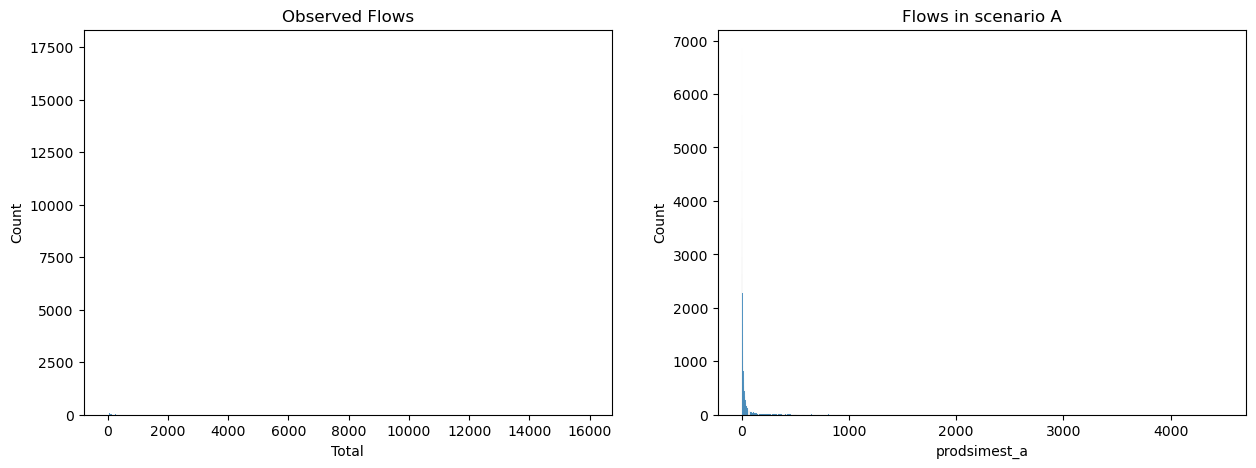

In [374]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(london_flows['Total'], ax=ax[0])
ax[0].set_title('Observed Flows')
sns.histplot(london_flows['prodsimest_a'], ax=ax[1])
ax[1].set_title('Flows in scenario A')
#sns.histplot(london_flows['prediction_2'], ax=ax[2])
#ax[2].set_title('Prediction 2')
plt.show()

In [ ]:
# plot heatmap of smallest differences
plt.figure(figsize=(12, 8))
sns.heatmap(smallest_diff, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap of Smallest Differences")
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.show()

# plot heatmap of largest differences
plt.figure(figsize=(12, 8))
sns.heatmap(largest_diff, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap of Largest Differences")
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.show()

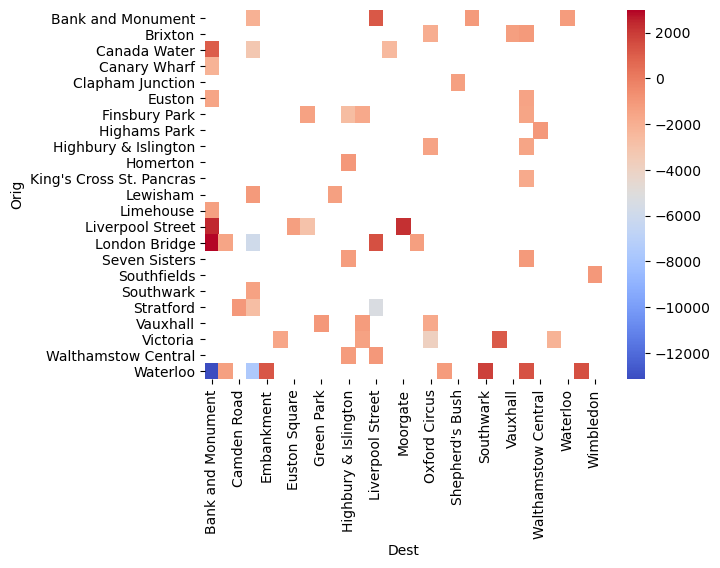

In [348]:
# Filter the flows that have changed significantly
significant_flows =london_flows [abs(london_flows['diff_a']) > 1000]

# Create a pivot table for significant flows
pivot_table = pd.pivot_table(significant_flows, values='diff_a', index='Orig', columns='Dest', aggfunc=np.sum)

# Create a heatmap
sns.heatmap(pivot_table,  cmap='coolwarm')
plt.show()


In [ ]:
# check flows into Canary Wharf
# Check the flow ends in canary wharf
res_ori=ldf_submat_prodc['Canary Wharf']

res_a=ldf_submat_prod_a['Canary Wharf']
res_a_1=ldf_submat_prod_a_1['Canary Wharf']
pd.concat([res_ori,res_a,res_a_1],axis=1)

,Canary Wharf,Canary Wharf,Canary Wharf
Orig,,,
Abbey Road,66.0,39.0,41.0
Acton Central,NaN,NaN,NaN
Acton Town,73.0,43.0,43.0
Aldgate,57.0,34.0,34.0
Aldgate East,81.0,48.0,48.0
...,...,...,...
Woodford,185.0,109.0,110.0
Woodgrange Park,NaN,NaN,NaN
Woodside Park,77.0,45.0,46.0


Scenario B: assume that there is a significant increase **in the cost of transport**. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

set up the adjusted $\beta$, we assume that $k$ is the increase in cost of transport, meaning the original cost is $c$ and new cost is $kc$

According to research (nature of transport cost and pricing), the  transport costs are proportional to distance
$f(d)=kd_{i j}$
Given a cost function that aligns with power law
$f(d)=d_{i j}^{-\beta}$
To adjust the parameter $\beta$ in the cost function reflecting the increase in cost of transport

$(kd_{i j})^{-\beta}=d_{i j}^{-\beta_{adjusted}}$

After taking logarithmic of both sides, the equation will look like the following 

$ \beta(log(k)+ log(d_{i j})=\beta_{adjusted}log(d_{ij})$


So $\beta_{adjusted}=\beta \frac{ log(d_{i j})+log(k)}{log(d_{i j})}$

Scenario B parameter 1

In [312]:
beta=-prodSim.params[-1]
beta

0.8781569676332593

In [376]:
beta*(london_flows['log_Dist'].mean()+np.log(1.25))/london_flows['log_Dist'].mean()

0.8988100402866469

In [313]:
beta_adj_25=beta*(london_flows['log_Dist']+np.log(1.25))/london_flows['log_Dist']
beta_adj_25.mean()

0.8989477824802116

In [314]:
london_flows_b=london_flows.copy()

In [315]:
# Use the new parameter to predict flow
# first recalculate the balanceing factor to ensure convergence
#calculate some new Dj^gamma and d_ij^beta values
Dj_gamma = london_flows["Dj_destjob"]**gamma
dist_beta_25 = london_flows["Dist"]**-beta_adj_25

#calcualte the first stage of the Ai values
london_flows_b["Ai1"] = Dj_gamma * dist_beta_25
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows_b.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i1"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows_b = london_flows_b.merge(A_i, left_on="Orig", right_index=True, how="left")

In [378]:
# Now generate new scenario estimate 
london_flows_b['prodsimest_b1']=london_flows_b['A_i1']*london_flows_b['O_i']*Dj_gamma*dist_beta_25
# round
london_flows_b['prodsimest_b1']=round(london_flows_b['prodsimest_b1'])

In [379]:
ldf_submat_prod_b1=london_flows_b.pivot_table(values ="prodsimest_b1", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat_prod_b1

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3744.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,24.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,8.0,35.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,6.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3095.0


Great! Now you have estimate new flows! GOOD JOBBBB!

Scenario B parameter 2

In [380]:
beta_adj_50=beta*(london_flows['log_Dist']+np.log(1.50))/london_flows['log_Dist']
beta_adj_50.mean()

0.9159351151079581

In [383]:
# Use the new parameter to predict flow
# first recalculate the balanceing factor to ensure convergence
#calculate some new Dj^gamma and d_ij^beta values
Dj_gamma = london_flows["Dj_destjob"]**gamma
dist_beta_50 = london_flows["Dist"]**-beta_adj_50

#calcualte the first stage of the Ai values
london_flows_b["Ai1"] = Dj_gamma * dist_beta_50
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows_b.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows_b = london_flows_b.merge(A_i, left_on="Orig", right_index=True, how="left")

In [384]:
# Now generate new scenario estimate 
london_flows_b['prodsimest_b2']=london_flows_b['A_i2']*london_flows_b['O_i']*Dj_gamma*dist_beta_50
# round
london_flows_b['prodsimest_b2']=round(london_flows_b['prodsimest_b2'])

In [ ]:
ldf_submat_prod_b2=london_flows_b.pivot_table(values ="prodsimest_b2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
ldf_submat_prod_b2

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [386]:
beta_adj_2=beta*(london_flows['log_Dist']+np.log(2))/london_flows['log_Dist']
beta_adj_2.mean()

0.9427391373075978

In [387]:
# Use the new parameter to predict flow
# first recalculate the balanceing factor to ensure convergence
#calculate some new Dj^gamma and d_ij^beta values
Dj_gamma = london_flows["Dj_destjob"]**gamma
dist_beta_50 = london_flows["Dist"]**-beta_adj_2

#calcualte the first stage of the Ai values
london_flows_b["Ai1"] = Dj_gamma * dist_beta_50
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows_b.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows_b = london_flows_b.merge(A_i, left_on="Orig", right_index=True, how="left")

In [388]:
# Now generate new scenario estimate 
london_flows_b['prodsimest_b3']=london_flows_b['A_i3']*london_flows_b['O_i']*Dj_gamma*dist_beta_50
# round
london_flows_b['prodsimest_b3']=round(london_flows_b['prodsimest_b3'])

Investigate the change


In [392]:
london_flows_b['diff_b1']=london_flows_b['prodsimest_b1']-london_flows_b['Total']
london_flows_b['diff_b1'].describe()

count    61413.000000
mean        -0.007344
std        103.140603
min     -12479.000000
25%          0.000000
50%          2.000000
75%          7.000000
max       3829.000000
Name: diff_b1, dtype: float64

In [399]:
london_flows_dist= london_flows_b.sort_values(["Dist"], ascending=False)
london_flows_dist[-5:-1]

,Orig,Dest,Total,Oi_origpop,Dj_destjob,Dist,unconstrainedEst1,log_Oi_origpop,log_Dj_destjob,log_Dist,...,A_i,A_i1,prodsimest_b1,A_i2_x,prodsimest_b2,A_i2_y,A_i2,A_i3,prodsimest_b3,diff_b1
58127,West India Quay,Canary Wharf,0,162,58772,327.235548,1197,5.087596,10.981421,5.790680,...,0.026512,0.031079,92.0,0.036475,94.0,0.028811,0.028811,0.037091,94.0,92.0
40970,Poplar,West India Quay,3,2271,400,260.856791,180,7.727976,5.991465,5.563972,...,0.033512,0.041477,51.0,0.048679,46.0,0.038678,0.038678,0.049794,46.0,48.0
58147,West India Quay,Poplar,0,162,1301,260.856791,42,5.087596,7.170888,5.563972,...,0.026512,0.031079,7.0,0.036475,6.0,0.028811,0.028811,0.037091,6.0,7.0
33545,Mansion House,Cannon Street,1,516,4698,248.175187,530,6.246107,8.454892,5.514135,...,0.008486,0.012892,23.0,0.015131,23.0,0.012021,0.012021,0.015476,23.0,22.0


In [397]:
diff_b_max=london_flows_b.nlargest(5,'diff_b1')
diff_b_max[['Orig','Dest','Total','Dist','prodsimest_b1','diff_b1']]

,Orig,Dest,Total,Dist,prodsimest_b1,diff_b1
32584,London Bridge,Bank and Monument,445,886.711434,4274.0,3829.0
32282,Liverpool Street,Bank and Monument,812,841.490882,4025.0,3213.0
32441,Liverpool Street,Moorgate,172,434.080019,3028.0,2856.0
56086,Waterloo,Southwark,109,656.415167,2511.0,2402.0
56133,Waterloo,Westminster,717,850.342561,2703.0,1986.0


In [396]:
diff_b_min=london_flows_b.nsmallest(5,'diff_b1')
diff_b_min[['Orig','Dest','Dist','Total','prodsimest_b1','diff_b1']]

,Orig,Dest,Dist,Total,prodsimest_b1,diff_b1
55890,Waterloo,Bank and Monument,2542.900106,15946,3467.0,-12479.0
55915,Waterloo,Canary Wharf,7433.856719,8085,1089.0,-6996.0
32609,London Bridge,Canary Wharf,5679.110688,6165,674.0,-5491.0
50041,Stratford,Liverpool Street,6698.344174,6946,1997.0,-4949.0
54769,Victoria,Oxford Circus,2220.118547,5181,1617.0,-3564.0


In [389]:
london_flows_b[['Total','prodsimest_b1','prodsimest_b2','prodsimest_b3']].describe()

,Total,prodsimest_b1,prodsimest_b2,prodsimest_b3
count,61413.000000,61413.000000,61413.000000,61413.000000
mean,25.113298,25.105955,25.105629,25.105629
std,131.479668,83.564952,85.431747,85.431747
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,2.000000
50%,3.000000,7.000000,7.000000,7.000000
75%,13.000000,20.000000,20.000000,20.000000
max,15946.000000,4274.000000,4441.000000,4441.000000


 Which scenario would have more impact in the redistribution of flows? 
Explain and justify your answers using the results of the analysis